In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/AI_Tailieu
!git clone https://github.com/arunponnusamy/object-detection-opencv
%cd object-detection-opencv/
!wget https://pjreddie.com/media/files/yolov3.weights

[Errno 2] No such file or directory: '/content/drive/MyDrive/AI_Tailieu'
/content
Cloning into 'object-detection-opencv'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 67 (delta 2), reused 2 (delta 0), pack-reused 61
Unpacking objects: 100% (67/67), 340.18 KiB | 8.95 MiB/s, done.
/content/object-detection-opencv
--2023-03-08 01:42:54--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  44.2MB/s    in 5.6s    

2023-03-08 01:43:00 (41.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



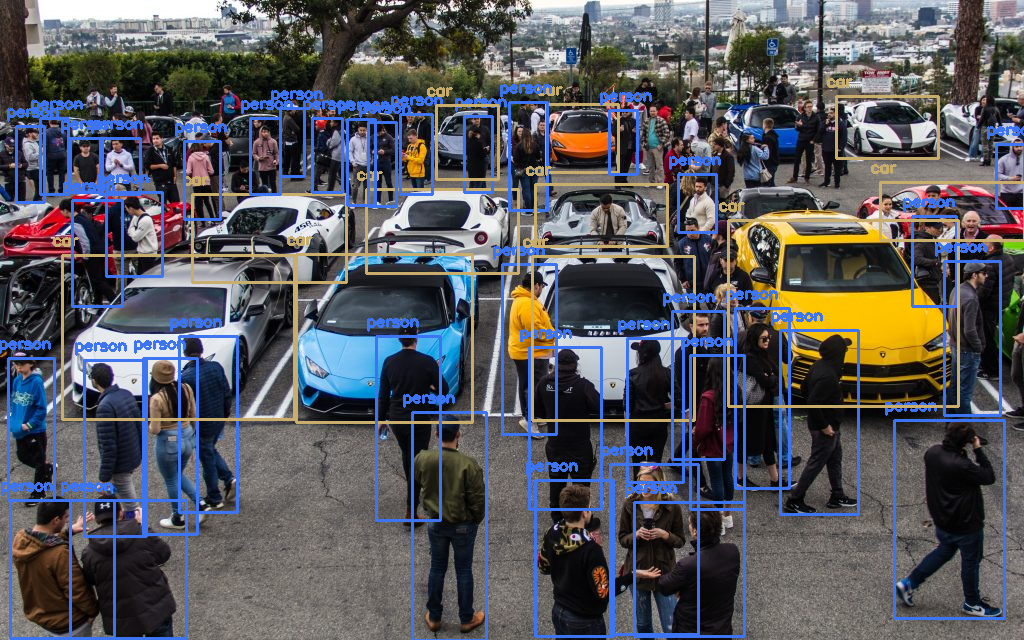

In [ ]:
#############################################
# Object detection - YOLO - OpenCV
# Author : Arun Ponnusamy   (July 16, 2018)
# Website : http://www.arunponnusamy.com
############################################
 
import cv2
import argparse
import numpy as np
from google.colab.patches import cv2_imshow
 
def get_output_layers(net):
    layer_names = net.getLayerNames()

    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
 
    return output_layers
 
def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(classes[class_id])
 
    color = COLORS[class_id]
 
    cv2.rectangle(img, (x, y), (x_plus_w, y_plus_h), color, 2)
 
    cv2.putText(img, label, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
 
# Ảnh test
image = cv2.imread('/content/drive/MyDrive/AI_1333/AI_Tuan5_2/IMG_2808-1024x640.jpg')
 
Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392
 
classes = None
# Đường dẫn đến file yolov3.txt trong google drive
with open('/content/drive/MyDrive/AI_1333/AI_Tuan5_2/object-detection-opencv/yolov3.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()]
 
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))
# Đường dẫn đến file yolov3.weights trong google drive
# Đường dẫn đến file yolov3.cfg trong google drive
net = cv2.dnn.readNet('/content/drive/MyDrive/AI_1333/AI_Tuan5_2/object-detection-opencv/yolov3.weights', '/content/drive/MyDrive/AI_1333/AI_Tuan5_2/object-detection-opencv/yolov3.cfg')
 
blob = cv2.dnn.blobFromImage(image, scale, (416, 416), (0, 0, 0), True, crop=False)
 
net.setInput(blob)
 
outs = net.forward(get_output_layers(net))
 
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4
 
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])
 
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
 
for i in indices:
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x + w), round(y + h))
 
cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()

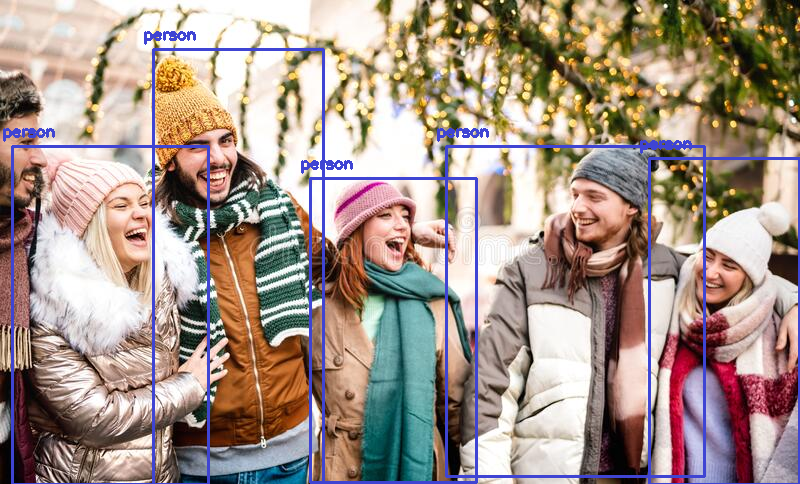

In [ ]:
#############################################
# Object detection - YOLO - OpenCV
# Author : Arun Ponnusamy   (July 16, 2018)
# Website : http://www.arunponnusamy.com
############################################
 
import cv2
import argparse
import numpy as np
from google.colab.patches import cv2_imshow
 
def get_output_layers(net):
    layer_names = net.getLayerNames()

    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
 
    return output_layers
 
def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(classes[class_id])
 
    color = COLORS[class_id]
 
    cv2.rectangle(img, (x, y), (x_plus_w, y_plus_h), color, 2)
 
    cv2.putText(img, label, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
 
# Ảnh test
image = cv2.imread('/content/drive/MyDrive/AI_1333/AI_Tuan5_2/happy-students-group-walking-city-sunny-winter-day-next-gen-life-style-concept-multicultural-young-people-wearing-237659573.jpg')
 
Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392
 
classes = None
# Đường dẫn đến file yolov3.txt trong google drive
with open('/content/drive/MyDrive/AI_1333/AI_Tuan5_2/object-detection-opencv/yolov3.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()]
 
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))
# Đường dẫn đến file yolov3.weights trong google drive
# Đường dẫn đến file yolov3.cfg trong google drive
net = cv2.dnn.readNet('/content/drive/MyDrive/AI_1333/AI_Tuan5_2/object-detection-opencv/yolov3.weights', '/content/drive/MyDrive/AI_1333/AI_Tuan5_2/object-detection-opencv/yolov3.cfg')
 
blob = cv2.dnn.blobFromImage(image, scale, (416, 416), (0, 0, 0), True, crop=False)
 
net.setInput(blob)
 
outs = net.forward(get_output_layers(net))
 
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4
 
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])
 
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
 
for i in indices:
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x + w), round(y + h))
 
cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()